In [1]:
from MuZero import MuZero
from GridWorldOption import GridWorldOption, GridWorldMacroAction

from GridWorld import GridWorld

from mcts.MCTS import MCTS
import numpy as np
import matplotlib.pyplot as plt

import random
from copy import deepcopy
import time

import pickle
import pandas as pd

from matplotlib.pyplot import figure
import itertools
from tqdm import tqdm


np.random.seed(52)
random.seed(52)

In [2]:
MAP_NAME = './maps/den_204d_multiple.map'

options = [
      GridWorldOption((0, 0),  {'all'}, 0, 0),
      GridWorldOption((0, 0),  {'all'}, 1, 1),
      GridWorldOption((0, 0),  {'all'}, 2, 2),
      GridWorldOption((0, 0),  {'all'}, 3, 3)
]

with open(MAP_NAME) as f:
    the_map = f.read()

In [3]:
SIMULATIONS = 40
SIM_FINISHS = 30000
GAMES = 500
ALPHA=0.01

In [4]:
env = GridWorld(the_map, SIM_FINISHS)
mu = MuZero(env, options)

In [5]:
start = time.time()
returns = mu.learn(GAMES, SIMULATIONS, alpha=ALPHA)
end = time.time()

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [43:57<00:00,  5.27s/it]


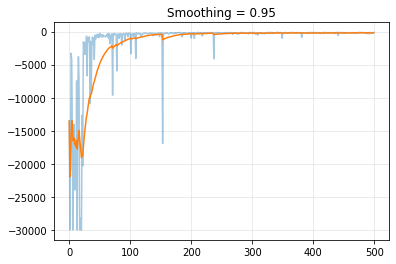

In [6]:
df = pd.DataFrame(data = {'value': np.array(returns[0:])})

SMOOTHING = 0.95
smooth = df.ewm(alpha=(1 - SMOOTHING)).mean()


plt.plot(df["value"], alpha=0.4)
plt.plot(smooth["value"])
plt.title("Smoothing = {}".format(SMOOTHING))
plt.grid(alpha=0.3)

plt.show()

In [7]:
starting_room_positions = set([(i,j) for i in range(25) for j in range(40,65)])

options = [
    # primitives, (0,0) is meaningless
    GridWorldOption((0, 0),   {'all'}, 0, 0),
    GridWorldOption((0, 0),   {'all'}, 1, 1),
    GridWorldOption((0, 0),   {'all'}, 2, 2),
    GridWorldOption((0, 0),   {'all'}, 3, 3),
    GridWorldOption((25, 50),  starting_room_positions, 4),
]

with open(MAP_NAME) as f:
    the_map = f.read()
    
env = GridWorld(the_map, SIM_FINISHS)
mu_ma = MuZero(env, options)

start_ma = time.time()
returns_ma = mu_ma.learn(GAMES, SIMULATIONS, alpha=ALPHA)
end_ma = time.time()

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [22:35<00:00,  2.71s/it]


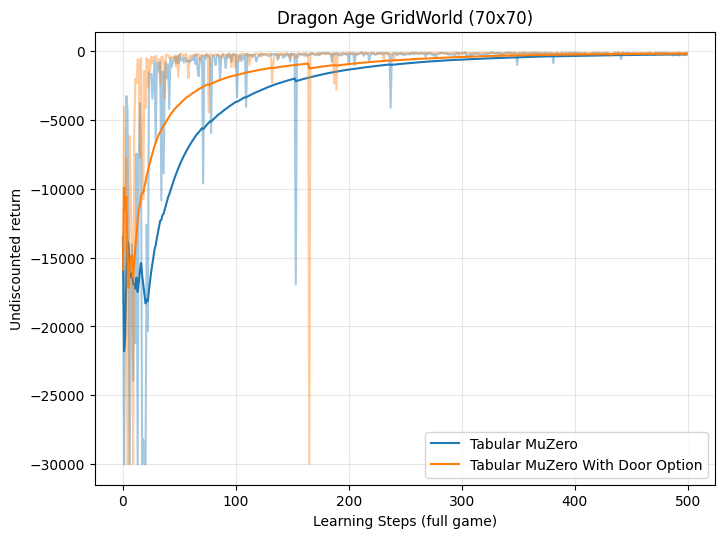

In [8]:
df = pd.DataFrame(data = {'value': np.array(returns[:])})
df_ma = pd.DataFrame(data = {'value': np.array(returns_ma[:])})

figure(figsize=(8, 6), dpi=100)

SMOOTHING = 0.99
smooth = df.ewm(alpha=(1 - SMOOTHING)).mean()
smooth_ma = df_ma.ewm(alpha=(1 - SMOOTHING)).mean()

plt.plot(df["value"], alpha=0.4, color='#1f77b4')
plt.plot(smooth["value"], color='#1f77b4', label='Tabular MuZero')
plt.plot(df_ma["value"], alpha=0.4, color='#ff7f0e')
plt.plot(smooth_ma["value"], color='#ff7f0e', label='Tabular MuZero With Door Option')

plt.title("Dragon Age GridWorld (70x70)".format(SMOOTHING))
plt.grid(alpha=0.3)

plt.xlabel("Learning Steps (full game)")
plt.ylabel("Undiscounted return")
plt.legend()
plt.show()

In [9]:
options = [
    # primitives, (0,0) is meaningless
    GridWorldOption((0, 0),   {'all'}, 0, 0),
    GridWorldOption((0, 0),   {'all'}, 1, 1),
    GridWorldOption((0, 0),   {'all'}, 2, 2),
    GridWorldOption((0, 0),   {'all'}, 3, 3),
    GridWorldMacroAction(0, 3, 4),
    GridWorldMacroAction(1, 3, 5),
    GridWorldMacroAction(2, 3, 6),
    GridWorldMacroAction(3, 3, 7),
]

with open(MAP_NAME) as f:
    the_map = f.read()
    
env = GridWorld(the_map, SIM_FINISHS)
mu_macro = MuZero(env, options)

start_macro = time.time()
returns_mu_macros = mu_macro.learn(GAMES, SIMULATIONS, alpha=ALPHA)
end_macro = time.time()

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [10:47<00:00,  1.30s/it]


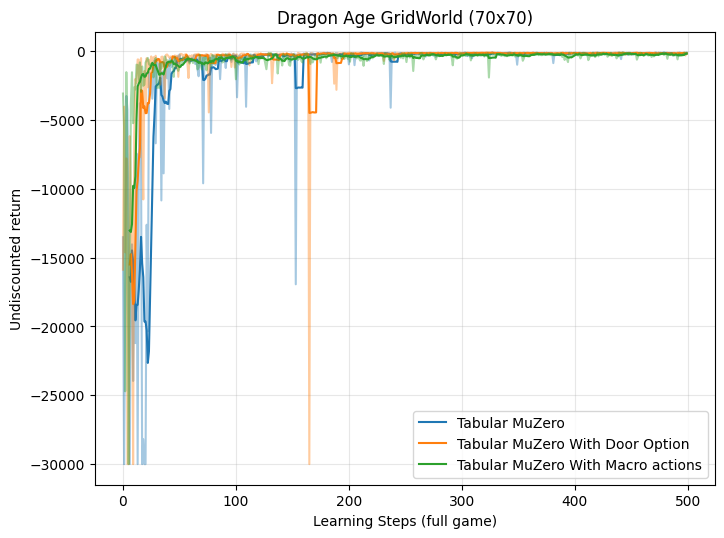

In [15]:
df = pd.DataFrame(data = {'value': np.array(returns[0:])})
df_ma = pd.DataFrame(data = {'value': np.array(returns_ma[0:])})
df_macro = pd.DataFrame(data = {'value': np.array(returns_mu_macros[0:])})

df.rolling(window=5).mean()


figure(figsize=(8, 6), dpi=100)

# SMOOTHING = 0.99
# smooth = df.ewm(alpha=(1 - SMOOTHING)).mean()
# smooth_ma = df_ma.ewm(alpha=(1 - SMOOTHING)).mean()
# smooth_macro = df_macro.ewm(alpha=(1 - SMOOTHING)).mean()

smooth = df.rolling(window=7).mean()
smooth_ma = df_ma.rolling(window=7).mean()
smooth_macro = df_macro.rolling(window=7).mean()

plt.plot(df["value"], alpha=0.4, color='#1f77b4')
plt.plot(smooth["value"], color='#1f77b4', label='Tabular MuZero')
plt.plot(df_ma["value"], alpha=0.4, color='#ff7f0e')
plt.plot(smooth_ma["value"], color='#ff7f0e', label='Tabular MuZero With Door Option')
plt.plot(df_macro["value"], alpha=0.4, color='#2ca02c')
plt.plot(smooth_macro["value"], color='#2ca02c', label='Tabular MuZero With Macro actions')

plt.title("Dragon Age GridWorld (70x70)".format(SMOOTHING))
plt.grid(alpha=0.3)

plt.xlabel("Learning Steps (full game)")
plt.ylabel("Undiscounted return")
plt.legend()
plt.show()

In [16]:
env = GridWorld(the_map, SIM_FINISHS)

In [18]:
with open('results/mu_mult.pickle', 'wb') as f:
    pickle.dump(mu, f)
    
with open('results/mu_ma_mult.pickle', 'wb') as f:
    pickle.dump(mu_ma, f)
    
with open('results/mu_macro_mult.pickle', 'wb') as f:
    pickle.dump(mu_macro, f)